In [2]:
"""
Created on Thurs Apr 27 18:00:00 2017

@author: Batul Zamin
"""

'\nCreated on Thurs Apr 27 18:00:00 2017\n\n@author: Batul Zamin\n'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras import losses

In [10]:
batch_size = 128
num_classes = 10
epochs = 5

In [11]:
def plot_digit_and_label(image, label):
    print(label)
    plt.imshow(image, cmap='gray')

5


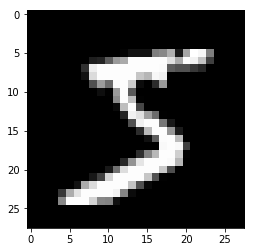

In [12]:
plot_digit_and_label(x_train[0], y_train[0])

In [13]:
def index_to_image_and_label(data_train, data_label, index):
    plot_digit_and_label(data_train[index], data_label[index])

8


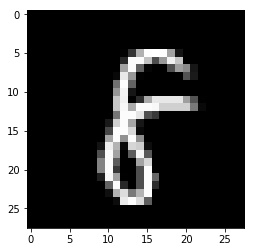

In [14]:
index_to_image_and_label(x_train, y_train, 456)

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(784,)))
model.add(Dense(500, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 776,510
Trainable params: 776,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
46s - loss: 11.5045 - acc: 0.2856 - val_loss: 10.2160 - val_acc: 0.3656
Epoch 2/5
44s - loss: 9.8586 - acc: 0.3881 - val_loss: 10.1075 - val_acc: 0.3728
Epoch 3/5
44s - loss: 9.8257 - acc: 0.3901 - val_loss: 9.7664 - val_acc: 0.3939
Epoch 4/5
44s - loss: 9.6567 - acc: 0.4006 - val_loss: 9.0512 - val_acc: 0.4382
Epoch 5/5
44s - loss: 8.7825 - acc: 0.4547 - val_loss: 8.5634 - val_acc: 0.4685


In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
44s - loss: 0.2565 - acc: 0.9248 - val_loss: 0.1198 - val_acc: 0.9632
Epoch 2/5
45s - loss: 0.0874 - acc: 0.9734 - val_loss: 0.1077 - val_acc: 0.9694
Epoch 3/5
44s - loss: 0.0564 - acc: 0.9821 - val_loss: 0.1029 - val_acc: 0.9707
Epoch 4/5
45s - loss: 0.0395 - acc: 0.9879 - val_loss: 0.0920 - val_acc: 0.9785
Epoch 5/5
44s - loss: 0.0289 - acc: 0.9907 - val_loss: 0.1132 - val_acc: 0.9742


In [23]:
y_hat = model.predict(x_test)

In [24]:
y_hat = model.predict_classes(x_test)

 9920/10000 [============================>.] - ETA: 0s

In [25]:
y_hat

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
(_, _), (_, test_labels) = mnist.load_data()

In [61]:
test_wrong = [im for im in zip(x_test, y_hat, test_labels) if im[1] != im[2]]
len(test_wrong)

231

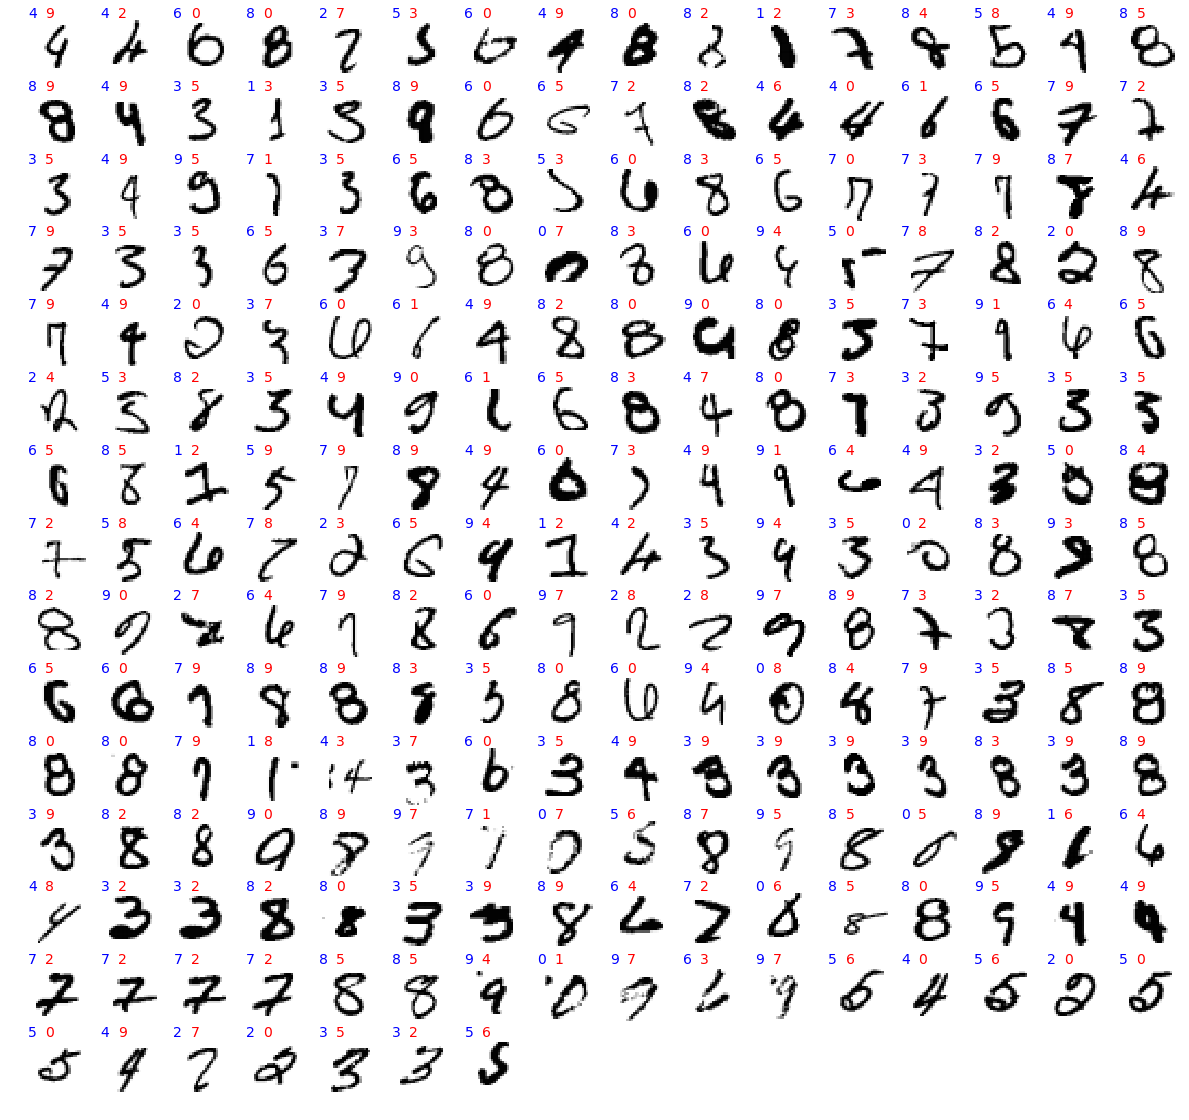

In [62]:
plt.figure(figsize=(16,16))
for index, digit in enumerate(test_wrong):
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.subplot(16,16, index+1)
    plt.imshow(1-digit[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.text(0, 0, digit[2], fontsize=14, color='blue')
    plt.text(8, 0, digit[1], fontsize=14, color='red')